In [57]:
# 1. Tokenize
# 2. Remove the stopwords
# 3. Lemmatization/Stemming
# 4. Document-Term Matrix -- TfIdf
# 5. Model

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#word_tokenize('An Apple a day keeps the doctor away.So, will I get sick soon?')
#tokenizer.tokenize('An Apple a day keeps the doctor away.So, will I get sick soon?')

In [59]:
reviews_df=pd.read_csv('Amazon_Reviews.csv')
y=reviews_df['Label']
y

0      1
1      1
2      1
3      1
4      1
      ..
194    1
195    1
196    0
197    0
198    0
Name: Label, Length: 199, dtype: int64

In [60]:
reviews_df.drop(columns='Label',inplace=True)

In [61]:
X_train,X_test,y_train,y_test=train_test_split(reviews_df,y,test_size=0.2,random_state=42)

# Tokenizer & stop words

In [62]:
tokenizer=RegexpTokenizer(r'\w+')
tokenizer


RegexpTokenizer(pattern='\\w+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [63]:
en_sw=stopwords.words('english')
en_sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Lemmatization/Stemming

In [64]:
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()
tfidf=TfidfVectorizer()

#stemmer.stem('cacti')
#lemmatizer.lemmatize('playing',pos='v')

In [65]:
def text_preprocessing(text):
    tokens=tokenizer.tokenize(text)
    pure_tokens=[token.lower() for token in tokens if token.lower() not in en_sw]
    lemmatized_tokens=[lemmatizer.lemmatize(token,pos='v') for token in pure_tokens]
    
    return ' '.join(lemmatized_tokens)


In [66]:
X_train['Review']=X_train['Review'].apply(text_preprocessing)
X_train['Review']



183    handful track hear far complete though miss me...
38     work mac clearly say line work mac os system d...
24     like album think would hear song two think lis...
142    pattern detail sketch although excite purchase...
141    contemporary fairytale sure delight book take ...
                             ...                        
106    authentic first encounter yoruba say cds reall...
14     awful beyond belief feel write keep others was...
92     omg soulwax own wow like amaze album ever ever...
179    yet another unsubstantiated case believe discr...
102    yes get book expect much man wrong love book m...
Name: Review, Length: 159, dtype: object

In [67]:
X_test['Review']=X_test['Review'].apply(text_preprocessing)
X_test['Review']

82     dirty south probably best southside cd ever co...
15     try fool us fake review glaringly obvious glow...
111    load fun 6 year old 5 year old really enjoy ga...
177    make fascinate read whale naturalist animal co...
76     bad deal order dvd receive substitute never re...
163    excellent product alphabet block beautiful cou...
68     great combination creativity adventure 4 year ...
67     even mommy fun one four year old daughter love...
120    worth wait jmm never release bad album many wo...
173    worth investment great set block research diff...
176    small work small compare think would even work...
148    three four star depend classic draw room comed...
65     profound truly horrible narrative style work f...
30     incorrect disc big jvc fan like model suspisci...
86     draw air book draw air pretty bad idea someone...
85     little one maid israel bill harvey wonderful g...
55     good receive defective book buy book move germ...
60     homer moses extremely he

In [68]:
train_tfidf=tfidf.fit_transform(X_train['Review'])
train_tfidf

<159x2348 sparse matrix of type '<class 'numpy.float64'>'
	with 5522 stored elements in Compressed Sparse Row format>

In [69]:
test_tfidf=tfidf.transform(X_test['Review'])
test_tfidf

<40x2348 sparse matrix of type '<class 'numpy.float64'>'
	with 968 stored elements in Compressed Sparse Row format>

In [70]:
mnb=MultinomialNB()
mnb.fit(train_tfidf,y_train)



MultinomialNB()

In [71]:
mnb_pred=mnb.predict(test_tfidf)
mnb_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [72]:
pos_probabs=mnb.predict_proba(test_tfidf)[::,1]
pos_probabs

array([0.63267571, 0.42504187, 0.72539178, 0.58047979, 0.43269878,
       0.71701702, 0.70281757, 0.6988829 , 0.74654801, 0.73659667,
       0.52076417, 0.47159633, 0.483029  , 0.46262047, 0.57222183,
       0.72587221, 0.60328656, 0.57926838, 0.34302637, 0.67160903,
       0.70329385, 0.52504   , 0.62848082, 0.71790063, 0.66821964,
       0.59159297, 0.33743504, 0.65827446, 0.62053523, 0.70466571,
       0.48973342, 0.62089197, 0.64010366, 0.8393374 , 0.65160254,
       0.72429519, 0.45203029, 0.4947946 , 0.51958351, 0.43043542])

In [73]:
confusion_matrix(y_test,mnb_pred)



array([[ 9,  6],
       [ 2, 23]], dtype=int64)

In [74]:
recall_score(y_test,mnb_pred)



0.92

In [75]:
precision_score(y_test,mnb_pred)



0.7931034482758621

In [76]:
fpr,tpr,thresholds=roc_curve(y_test,pos_probabs)



Text(0, 0.5, 'True Positive Rate')

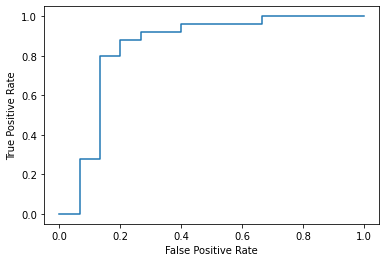

In [77]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')



In [78]:
roc_auc_score(y_test,pos_probabs)



0.8426666666666667

In [79]:
accuracy_score(y_test,mnb_pred)

0.8